In [18]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [85]:
with open('몬스터에너지.json') as json_file:
    json_data = json.load(json_file)

In [86]:
df = pd.DataFrame(json_data['data'])

In [87]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[밤늦게까지 일어나있어야할땐 몬스터 에너지🔥🔥\n\n#유료광고 #몬스터에너지 #오늘...,"[유료광고, 몬스터에너지, 오늘도몬스터, 에너지드링크, 나만의파라다이스, 울트라파라...",[],2020년 7월 27일,"[7,982]"
1,1,[🍏🧃⛳️♻️❇️\n\n덥고 지치는 여름에 꼭 필요하...,"[유료광고, 몬스터에너지, MonsterEnergy, 울ᄐ...",[],2020년 7월 28일,"[dear.heejin, 5,476]"
2,2,[#유료광고 요즘 같이 지치는 날들에 몬스터 에너지에서 보내준 선물.\n몬스터 에너...,"[유료광고, 몬스터에너지, monsterenergy, 울트라파라다이스, 나만의파라다...",[],2020년 9월 7일,"[8,800]"
3,3,[#유료광고\n요즘 너무 바쁜 하루를 보내지만\n몬스터 에너지로 충전하고 다시 파이...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 9월 16일,"[10,487]"
4,4,[촬영할때마다 찾게되는 몬스터 에너지 !\n...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 7월 24일,"[14,415]"
...,...,...,...,...,...,...
9995,9995,[.\n3~4일동안 마신 몬스터캔\n시...실화냐...;;;\n코카콜라 보고 있나?...,"[MONSTERENERGY, 몬스터에너지, 실화냐, 협찬환영]",[Midnight Factory Bistro - 미드나이트 팩토리],2018년 5월 5일,[25]
9996,9996,[만성피로에 시달리기에 카페인을 끊을수가 없다.. #몬스터에너지 #레드불 #핫식스 ...,"[몬스터에너지, 레드불, 핫식스, 운동전, 부스터, 카페인, 중독, 망할, 젠장, ...",[],2018년 5월 5일,[29]
9997,9997,[#주말운동 .\n.\n#몬스터에너지\n운동중\n.\n.\n.\n#에너지부스터\n....,"[주말운동, 몬스터에너지, 에너지부스터, 몬스터, 먹고, 운동하자, 무설탕, 새로운...",[새마을휘트니스 명일점],2018년 5월 5일,[70]
9998,9998,[#몬스터에너지 로 힘내서코딩#멋사 #LikeLion 12개 대학교 파전연합 #오늘...,"[몬스터에너지, 멋사, LikeLion, 오늘도몬스터, 몬스터에너지, 뉴비톤, 지금...",[Google Campus Seoul],2018년 5월 5일,[33]


# Hashtags 분석

# 1. Word Cloud

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [89]:
tags = [element for array in list(df.Hashtags) for element in array]

In [90]:
tags[0:5]

['유료광고', '몬스터에너지', '오늘도몬스터', '에너지드링크', '나만의파라다이스']

In [91]:
monster_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500' ]

In [92]:
cv = CountVectorizer(max_features=10000, stop_words = monster_stop_words)

In [93]:
tdm = cv.fit_transform(tags)

In [94]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [95]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
3258,데이바이핏,1733
492,dayxfit,1718
8268,일상,1121
7428,오늘도몬스터,1063
3081,다이어트,920
7928,운동하는여자,725
7870,운동,640
7922,운동하는남자,632
7890,운동스타그램,601
8016,웨이크보드,577


In [96]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [97]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

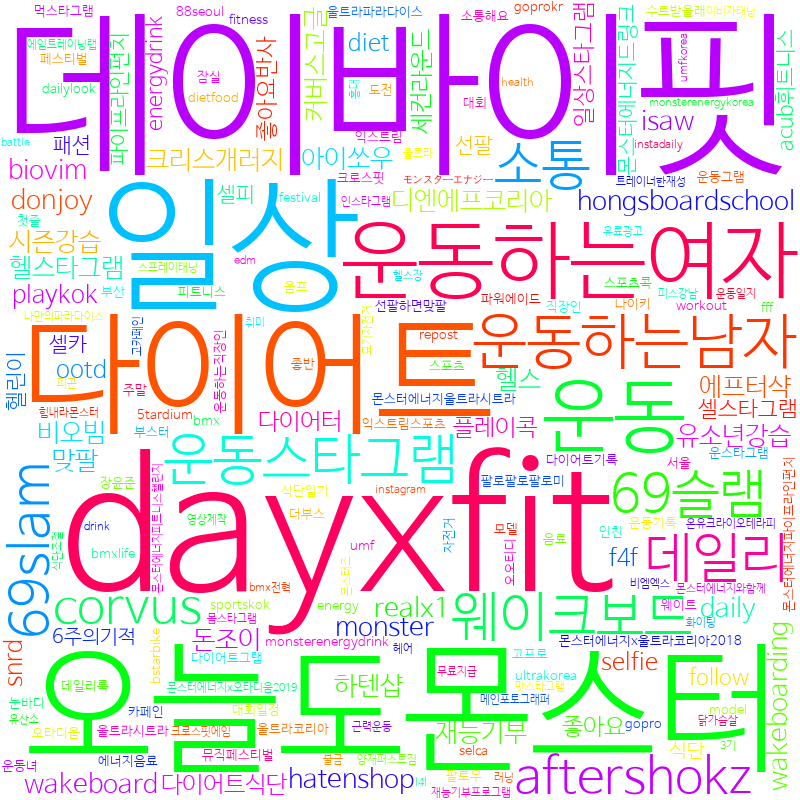

In [98]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [99]:
tdm.shape

(137294, 10000)

In [100]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [101]:
words = cv.get_feature_names()

In [102]:
tokens = tags

In [103]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 1min 34s


In [104]:
from sklearn.decomposition import TruncatedSVD

In [105]:
svd = TruncatedSVD(n_components=1000)

In [106]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [107]:
svd.components_.shape

(1000, 10000)

In [108]:
word_emb = svd.components_.T

In [109]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

데이바이핏 3258
dayxfit 492
일상 8268
오늘도몬스터 7428
다이어트 3081
운동하는여자 7928
운동 7870
운동하는남자 7922
운동스타그램 7890
웨이크보드 8016
소통 5062
데일리 3267
69slam 144
69슬램 145
커버스고글 9002
에프터샥 7030
hongsboardschool 806
시즌강습 5749
corvus 433
유소년강습 8055
realx1 1404
디엔에프코리아 3397
aftershokz 199
wakeboard 1759
wakeboarding 1760
크리스개러지 9119
isaw 875
아이쏘우 6274
하텐샵 9625
hatenshop 772
비오빔 4418
biovim 293
헬스 9771
몬스터에너지 1964
daily 467
맞팔 3672
헬스타그램 9789
monster 1105
돈조이 3318
donjoy 538
재능기부 8396
playkok 1331
플레이콕 9492
다이어터 3078
snrd 1518
세컨라운드 4985
다이어트식단 3094
ootd 1262
좋아요 8577
f4f 594
일상스타그램 8280
selfie 1470
좋아요반사 8581
diet 505
헬린이 9759
셀스타그램 4990
follow 642
몬스터에너지드링크 3860
선팔 4852
셀피 5005
energydrink 575
패션 9346
파이프라인펀치 9300
셀카 4991
acub휘트니스 187
6주의기적 149
식단 5808
monsterenergydrink 1120
운동하는직장인 7930
오오티디 7636
운동그램 7874
눈바디 3032
선팔하면맞팔 4858
울트라파라다이스 7959
에너지음료 6983
팔로우 9321
운동녀 7877
umf 1689
서울 4714
인친 8236
피트니스 9538
카페인 8951
움프 7964
도전 3304
소통해요 5066
먹스타그램 3727
좋반 8570
수트받을래 5288
스포츠콕 5590
sportskok 1533
5tardium 134
데

In [110]:
word_emb = svd.components_.T

In [111]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [112]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 2min 1s


30

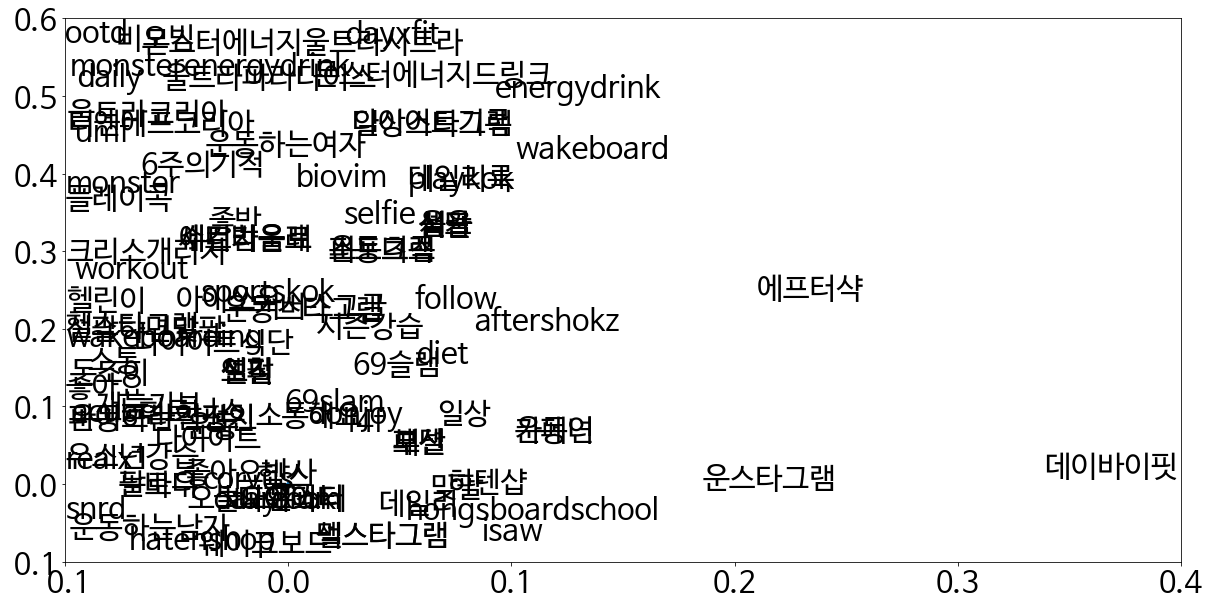

In [113]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.4)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [114]:
from sklearn.manifold import TSNE

In [115]:
tsne = TSNE()

In [116]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 20min 34s


126

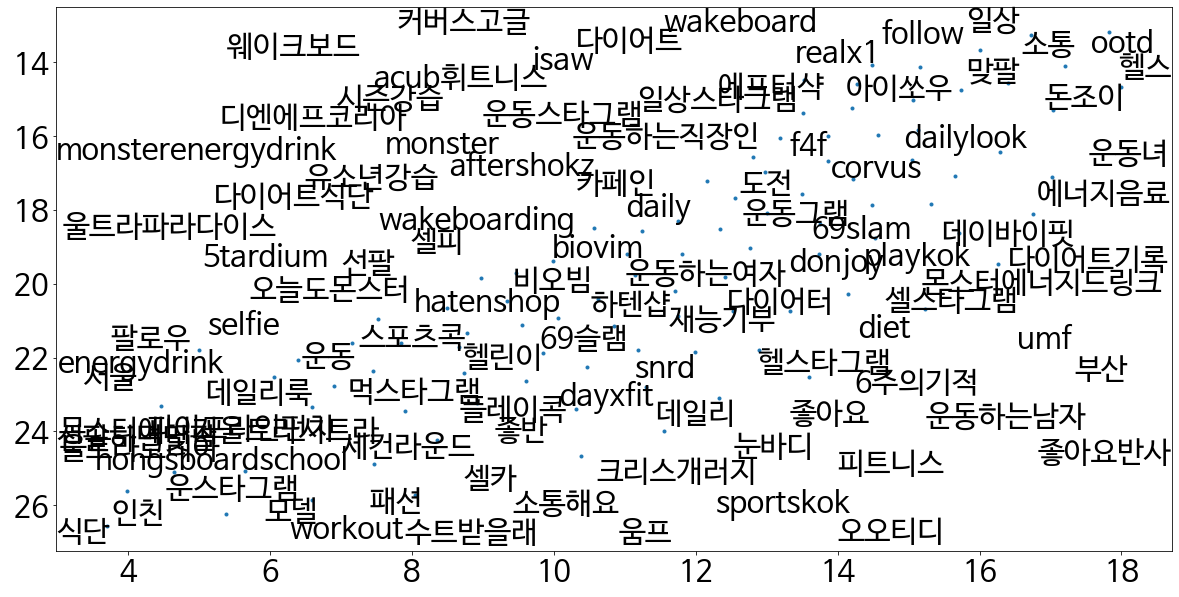

In [117]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [118]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [119]:
sentences = list(df['Hashtags'])

In [120]:
model = Word2Vec(sentences, size = 1000, min_count = 200, workers = 4, window = 100) # negative, sg

In [121]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [122]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [123]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

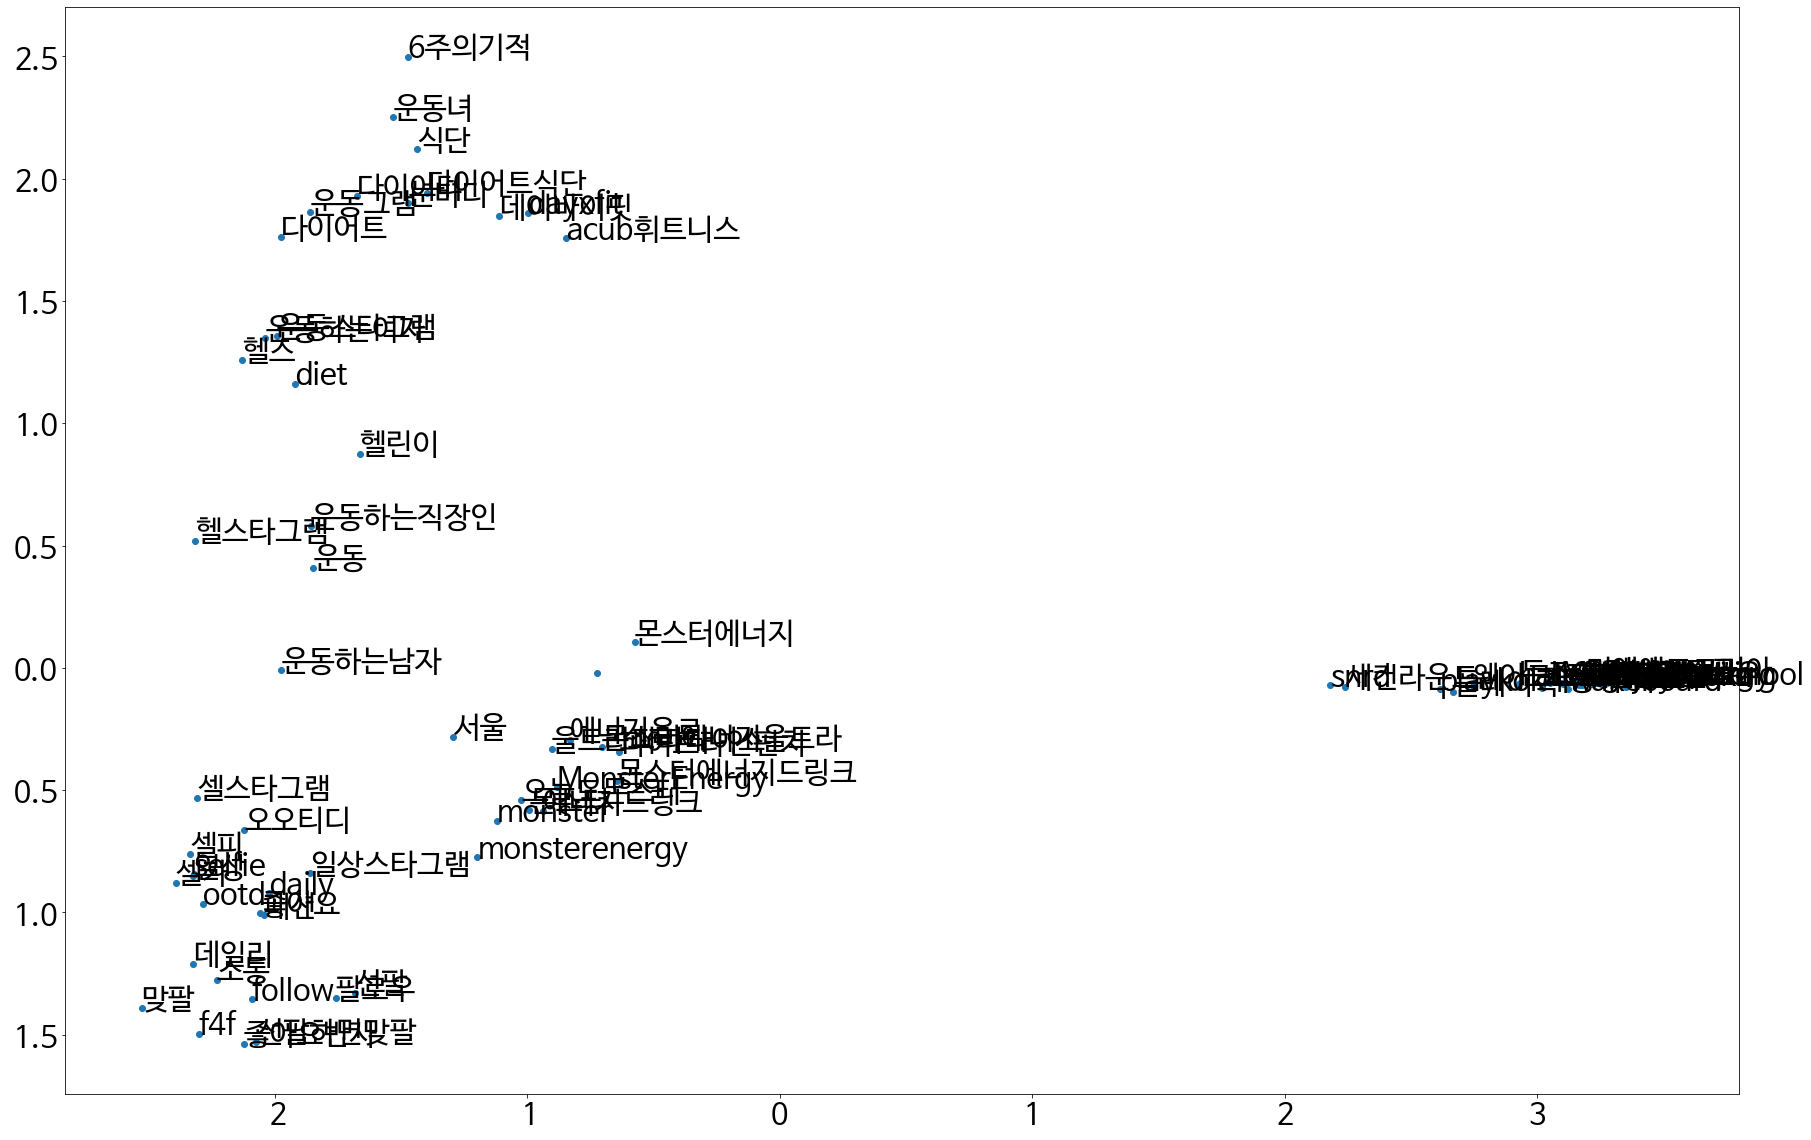

In [124]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [59]:
locates = [element for array in list(df.Locates) for element in array]

In [60]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [61]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
468,seoul,271
131,cub,142
545,ultra,73
764,난지한강공원,69
873,라이브홀,68


In [62]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [63]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

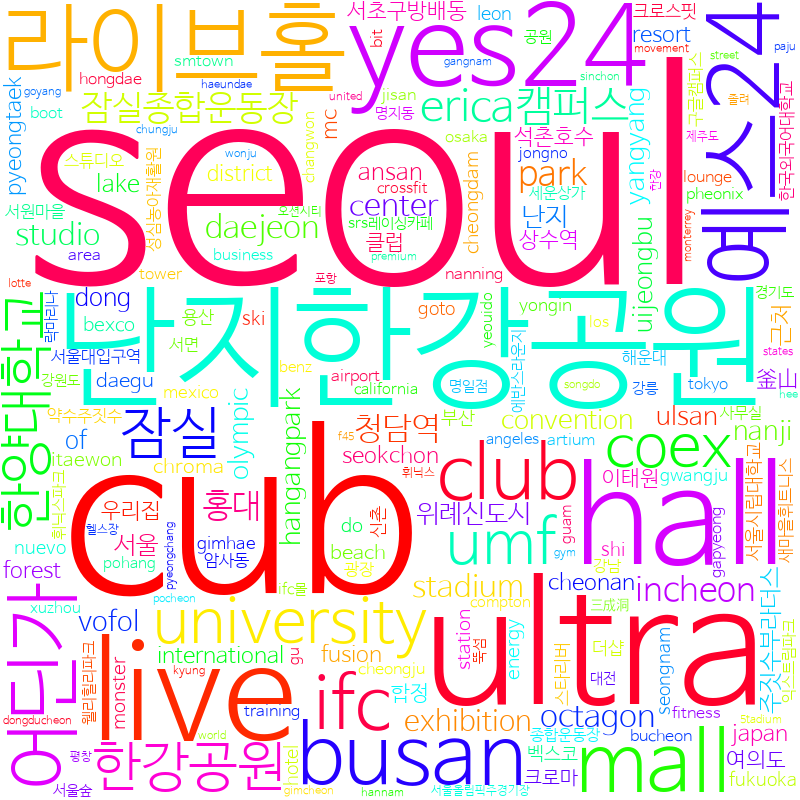

In [64]:
cloud.to_image()

## - Embedding

- LSA

In [65]:
tdm.shape

(2671, 1663)

In [66]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [67]:
words = cv.get_feature_names()
tokens = locates

In [68]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 177 ms


In [69]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 3.06 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [70]:
svd.components_.shape

(1000, 1663)

In [71]:
word_emb = svd.components_.T

In [72]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 468
cub 131
ultra 545
난지한강공원 764
라이브홀 873
hall 232
yes24 594
live 335
예스24 1288
busan 78
mall 344
어딘가 1244
club 115
ifc 273
university 552
umf 546
coex 118
잠실 1399
한양대학교 1614
한강공원 1602
잠실종합운동장 1408
erica캠퍼스 166
park 414
incheon 278
홍대 1641
청담역 1484
daejeon 138
octagon 399
stadium 499
center 91
studio 509
exhibition 169
vofol 564
convention 127
hangangpark 235
난지 763
위례신도시 1343
olympic 402
yangyang 588
nanji 378
ulsan 544
서울 1080
uijeongbu 543
釜山 628
주짓수부라더스 1441
근처 738
dong 150
of 400
ansan 31
lake 327
상수역 1063
forest 183
석촌호수 1102
서초구방배동 1097
pyeongtaek 437
우리집 1311
cheonan 96
seokchon 465
resort 443
fusion 187
여의도 1263
international 280
mc 347
japan 286
district 145
이태원 1372
합정 1622
클럽 1534
chroma 104
daegu 137
크로마 1529
beach 51
energy 162
cheongdam 97
do 149
벡스코 983
station 505
부산 1001
itaewon 281
monster 361
서울시립대학교 1088
bexco 55
seongnam 467
더샵 830
크로스핏 1530
hotel 262
스타리버 1161
fukuoka 186
ski 482
nuevo 395
신촌 1189
용산 1303
goto 203
leon 331
shi 471
구글캠퍼스 716
약수주짓수 1230
암사동 1

In [73]:
word_emb = svd.components_.T

In [74]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 34s


121

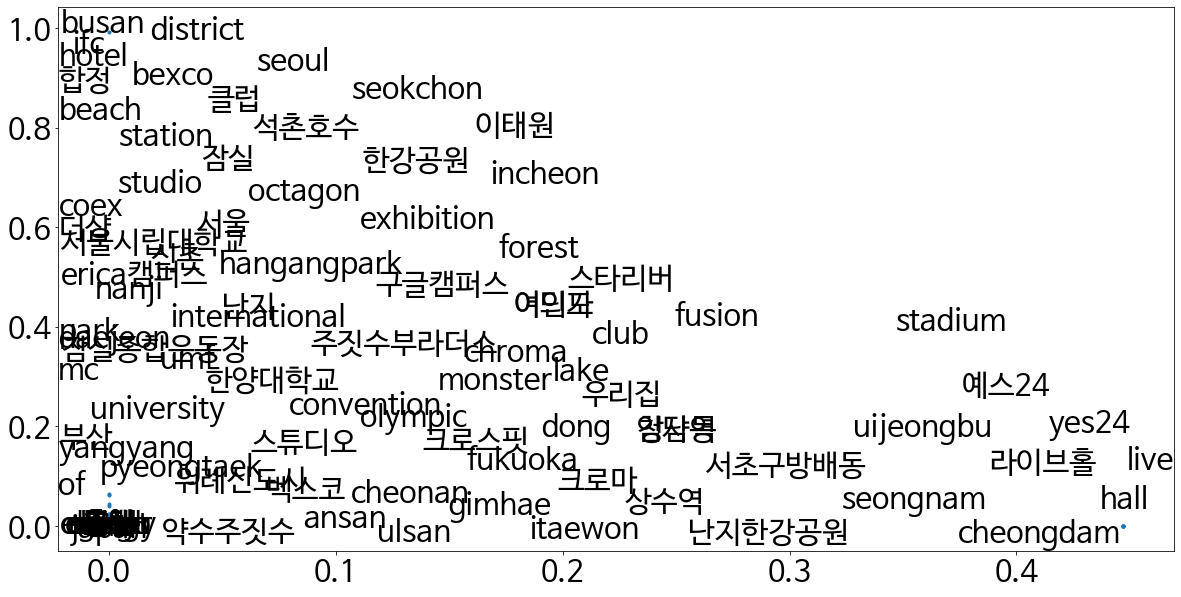

In [75]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [76]:
tsne = TSNE()

In [77]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 42.1 s


156

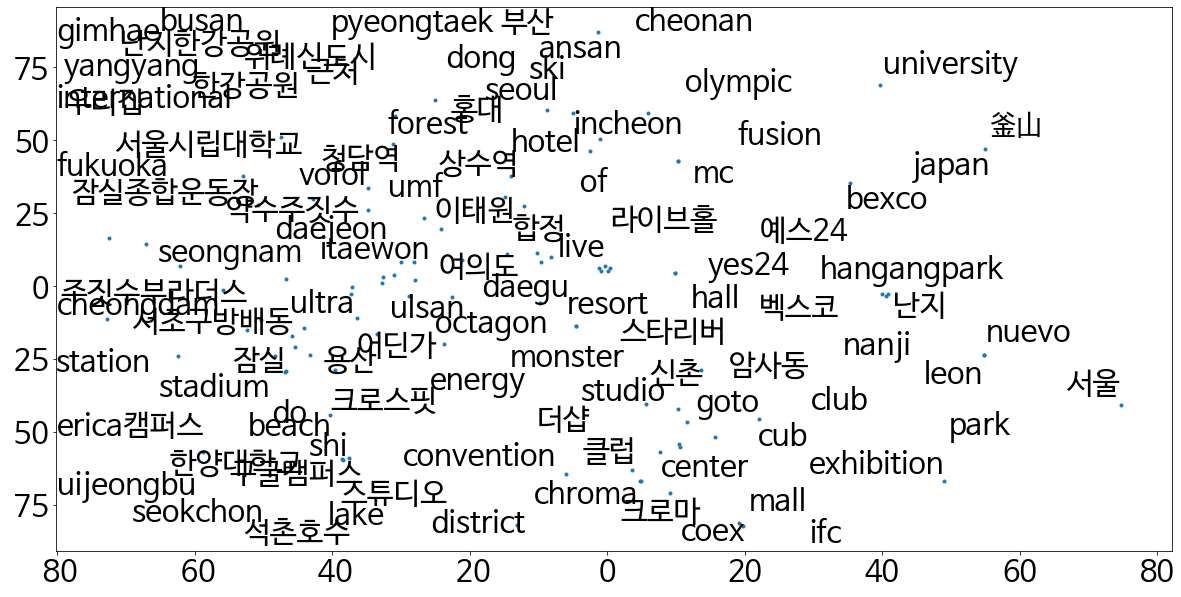

In [78]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [79]:
sentences = list(df['Locates'])

In [80]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [81]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [82]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 8.98 ms


In [83]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

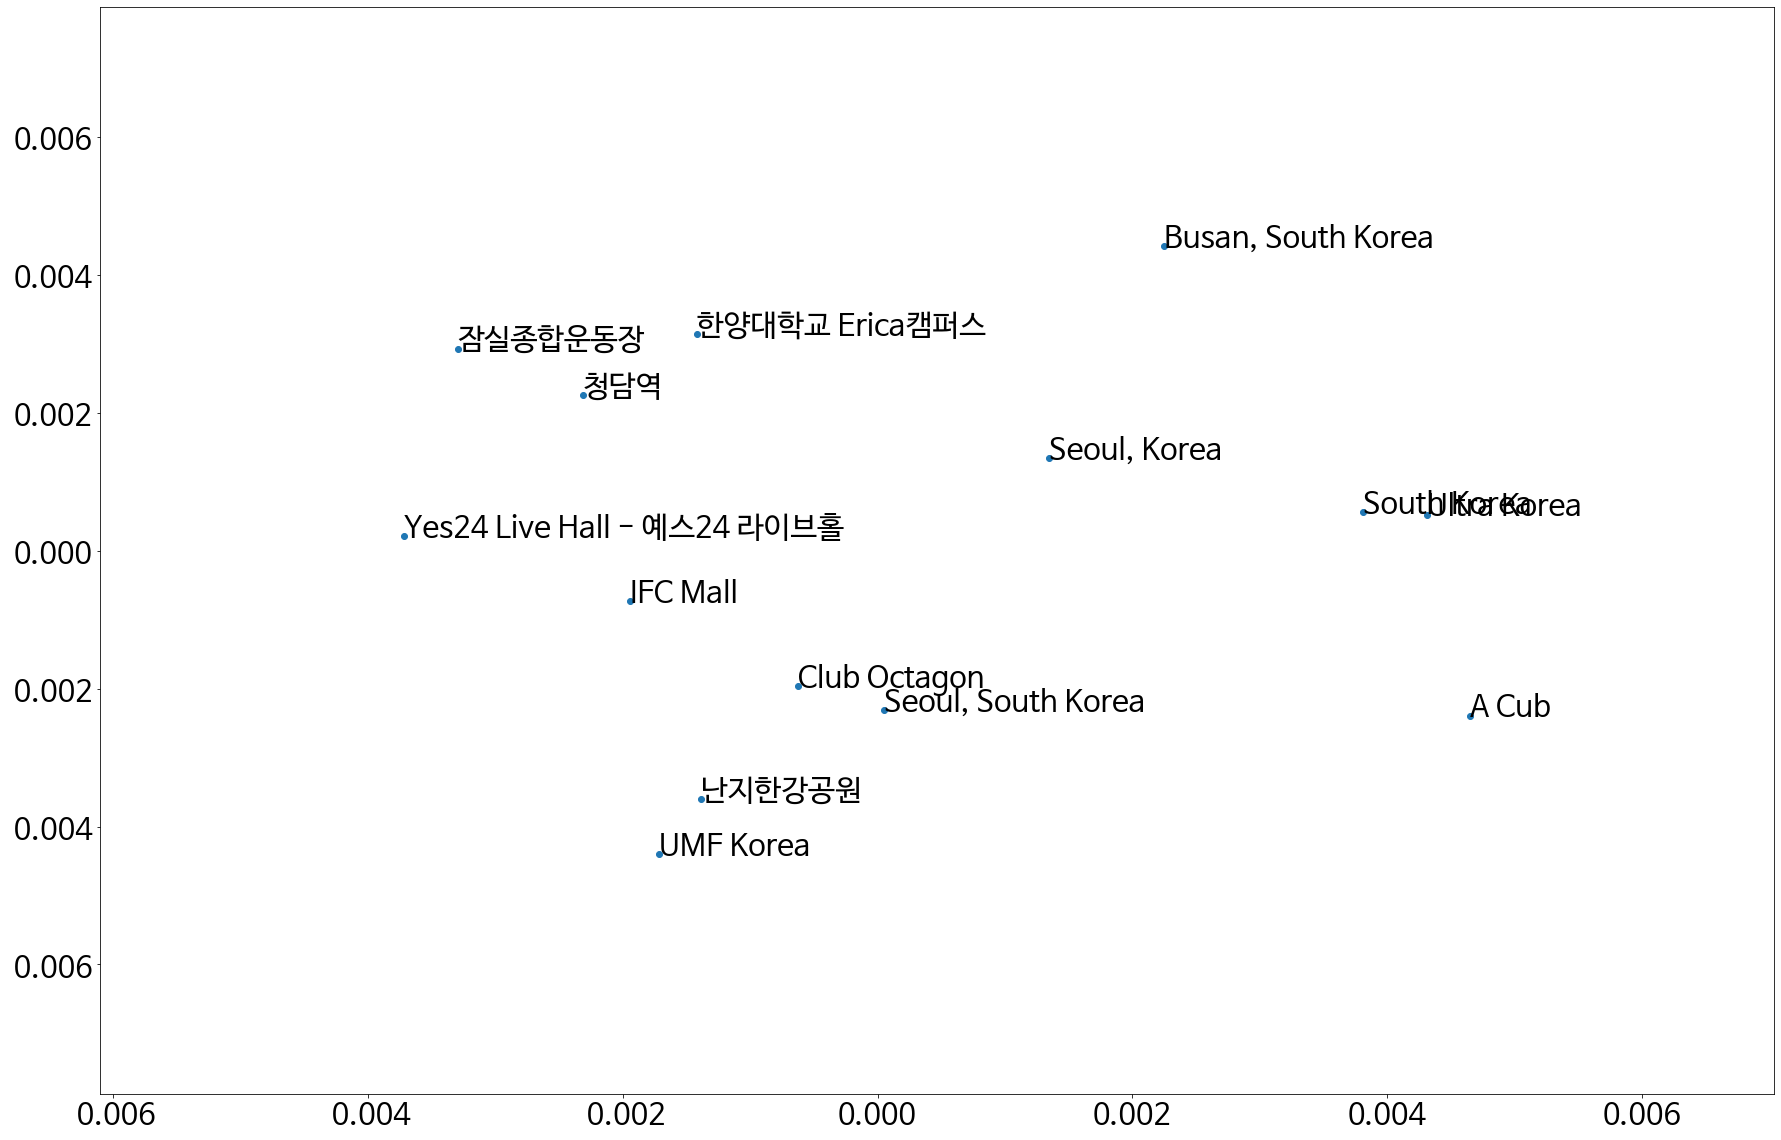

In [84]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))